
# Project: Investigate TMDB movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDB dataset presents informations about 10866 hollywood movies that are released between 1960 and 2015. 13 different features are presented for each movie such as; budget, popularity, genres, vote average, budget, ..etc.<br>
Given this large amount of information, many questions arise. In this project we'll try to answer the following questions:

- What is the most and least profitable movies each year?
- Which genres are most popular for each year?
- From the top 5 most productive producers, who is the most successful director in terms of average movie rating?
- Which features are associated with high revenue movies?

In [21]:
#Loading libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

First, we're going to take a quick look on our dataset to see how it is structured what what are the types of features that we have.

In [39]:
# Loading data

df= pd.read_csv('tmdb-movies.csv')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

None

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



## Data Cleaning
After setting the questions that we're going to answer in this investigation, we need to clean our data set in order to prepare it for the exploration and analysis.

### Adjusting the data types
We have all the types set correctly for every column except for the 'release_date' column it is concidered a string when it should be a datetime type in order to manipulate it easily using the appropriate methods and functions.


In [40]:
type(df['release_date'][1])

str

In [41]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


### Dropping columns
Some of columns on our TMDB dataset are irrelevant to our investigation, so in this section we're going to drop the following columns:
- id
- imdb_id
- homepage
- tagline
- keywords
- cast
- production_companies
- overview

In [42]:
df.drop(columns=['id','imdb_id','homepage', 'tagline', 'keywords', 'cast', 'production_companies', 'overview'], inplace=True)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

After cleaning our dataset, now we're going to explore it in order to find answers to our questions.

### What is the most and least profitable movie each year?
In order to answer this question we need first to create a new column called 'profit' which contains the profit value for each movie calculated using the columns 'budget' and 'revenue. Then, we are going to group our data set by year and then look for the most profitable movie each year.

In [47]:
df['profit']=df['revenue']-df['budget']
df['profit_adj']=df['revenue_adj']-df['budget_adj']
df.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08


,release_year,original_title
10143,1960,Spartacus
10110,1961,One Hundred and One Dalmatians
9849,1962,Dr. No
10438,1963,From Russia With Love
9881,1964,Goldfinger


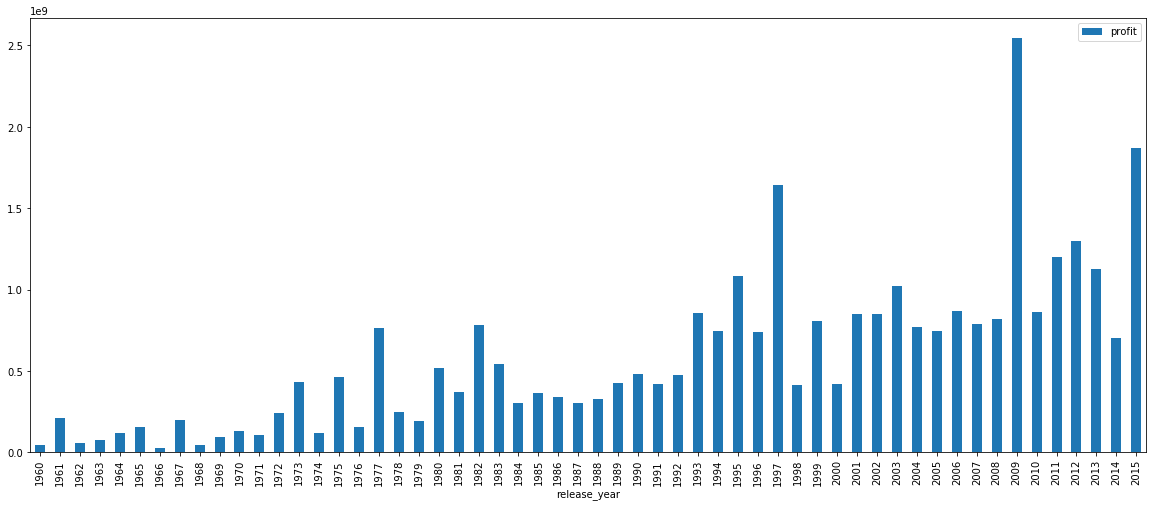

In [232]:
idx = df.groupby(['release_year'])['profit'].transform(max) == df['profit']
most_prof=df[idx].sort_values(by='release_year')[['release_year','original_title']]
display(most_prof.head())

max_profit=df.groupby(['release_year'])[['profit']].max()
max_profit.plot.bar(figsize=(20,8))

,release_year,original_title
10146,1960,The Time Machine
10122,1961,The Misfits
9868,1962,The Longest Day
10444,1963,"It's a Mad, Mad, Mad, Mad World"
9914,1964,"Kiss Me, Stupid"


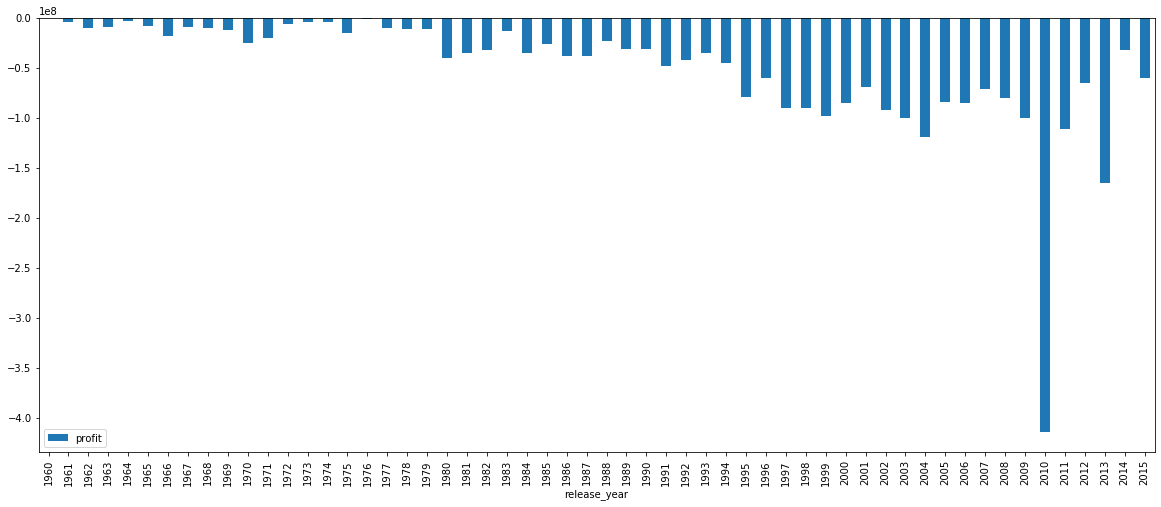

In [270]:
idx2 = df.groupby(['release_year'])['profit'].transform(min) == df['profit']
least_prof=df[idx2].sort_values(by='release_year')[['release_year','original_title']]
display(least_prof.head())

min_profit=df.groupby(['release_year'])[['profit']].min()
min_profit.plot.bar(figsize=(20,8))

### Which genres are most popular for each year?

For the second question, we want to find out the popular genres each year. To accomplish that, we need to determine the average popularity of each genres in each year and then find out the most popular genres for each year.

In [134]:
pop_genres=df.groupby(['release_year','genres'])['popularity'].mean()
display(pop_genres)
l=[]
for item in range(1960, 2016):
    l.append(pop_genres[item].idxmax())
most_pop_genres=pd.Series(l)
most_pop_genres.index=list(range(1960,2016))
most_pop_genres.head(5)

release_year  genres                                
1960          Action|Adventure|Drama|History|Western    0.310398
              Action|Adventure|Western                  1.872132
              Action|Drama|Foreign|History|War          0.194948
              Action|Drama|History                      1.136943
              Action|Drama|History|War                  0.256779
                                                          ...   
2015          War|Action                                0.356519
              War|Adventure|Science Fiction             5.476958
              War|Drama                                 0.561032
              Western|Drama                             0.747541
              Western|Drama|Adventure|Thriller          9.110700
Name: popularity, Length: 6099, dtype: float64

1960                Drama|Horror|Thriller
1961    Adventure|Animation|Comedy|Family
1962            Adventure|Action|Thriller
1963            Action|Thriller|Adventure
1964            Adventure|Action|Thriller
dtype: object

### From the top 5 most productive producers, who is the most successful director in terms of average movie rating?
To answer this question, we need first o look for the most productive producers in the period 1960-2015. After that we need to calculate the average movie ratings for each one of the top 5 producers.

Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     29
Ridley Scott        23
Name: director, dtype: int64

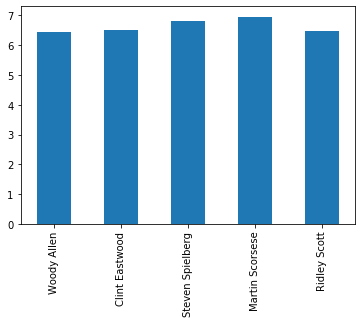

In [172]:
top_prod=df['director'].value_counts().head()
display(top_prod)
df.groupby(['director'])['vote_average'].mean()[top_prod.index].plot(kind="bar");

### Which features are associated with high revenue movies?
Determining the features associated with high revenue movies can be achieved by plotting the scatter plot of different quantitative features with respect to the revenue.
The features might be associated with high revenue movies are:
- budget
- runtime
- popularity
- vote_raverage
- release_year

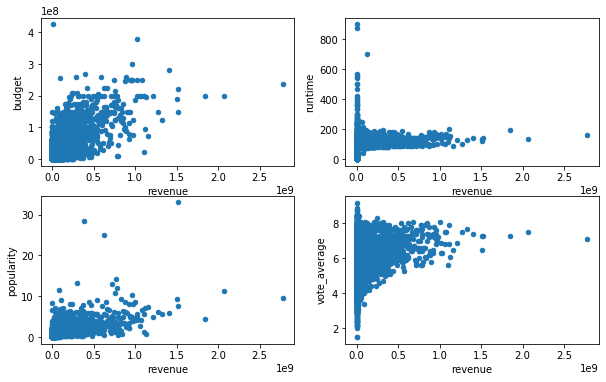

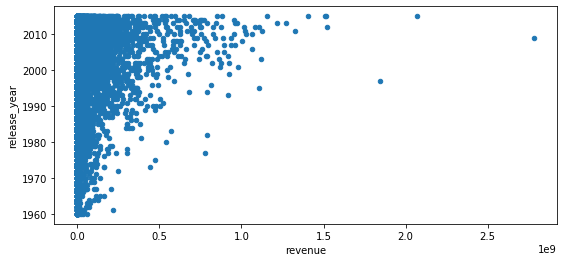

In [293]:
fig= plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
df.plot(kind='scatter', x='revenue', y='budget', ax=ax1)
df.plot(kind='scatter', x='revenue', y='runtime', ax=ax2)
df.plot(kind='scatter', x='revenue', y='popularity', ax=ax3)
df.plot(kind='scatter', x='revenue', y='vote_average', ax=ax4)
df.plot(kind='scatter', x='revenue', y='release_year', figsize=(9,4));

<a id='conclusions'></a>
## Conclusions


In this project we have investigated the TMDB dataset and we used the tools provided by pandas, matplotlib and numpy libraries to answer the proposed questions.
As a first step, we cleaned the provided dataset by dropping some irrelevant columns and adjusting the type of a certain feature.
Then, we explored the data we have so that we can find the hidden informations that would answer our questions. Here is our findings:
- Question 1
The most, and least profitable movies each year are shown in the list below:

In [285]:
# We need to rename column in order to concatenate both most_prof and least_prof dataframes.
# There are 2 duplicated rows in the least_prof dataframe which can be dealt with by chosing to keep only one.

least_prof.rename(columns={'original_title':'least_prof_movie'},inplace=True)
least_prof.reset_index(drop=True, inplace=True)
least_prof.drop(least_prof[least_prof['release_year'].duplicated(keep='first')].index, inplace=True)

most_prof.rename(columns={'original_title':'most_prof_movie'},inplace=True)
most_prof.reset_index(drop=True, inplace=True)

q1=pd.concat([most_prof, least_prof['least_prof_movie']], axis=1)
q1.set_index('release_year')


,most_prof_movie,least_prof_movie
release_year,,
1960,Spartacus,The Time Machine
1961,One Hundred and One Dalmatians,The Misfits
1962,Dr. No,The Longest Day
1963,From Russia With Love,"It's a Mad, Mad, Mad, Mad World"
1964,Goldfinger,"Kiss Me, Stupid"
1965,The Sound of Music,The Greatest Story Ever Told
1966,Who's Afraid of Virginia Woolf?,The Bible: In the Beginning...
1967,The Jungle Book,Doctor Dolittle
1968,2001: A Space Odyssey,Chitty Chitty Bang Bang


- Question 2

The most popular genres for each year are the folowing based on the proplarity feature are the following:

In [286]:
most_pop_genres

1960                                Drama|Horror|Thriller
1961                    Adventure|Animation|Comedy|Family
1962                            Adventure|Action|Thriller
1963                            Action|Thriller|Adventure
1964                            Adventure|Action|Thriller
1965                            Adventure|Action|Thriller
1966                              Animation|Family|Comedy
1967                           Family|Animation|Adventure
1968                    Science Fiction|Mystery|Adventure
1969                            Adventure|Action|Thriller
1970                    Animation|Comedy|Family|Adventure
1971                                Science Fiction|Drama
1972                                          Drama|Crime
1973                                     Animation|Family
1974                                          Drama|Crime
1975                            Horror|Thriller|Adventure
1976                                          Crime|Drama
1977          

- Question 3

From the top 5 most productive producers, the most successful director in terms of average movie rating is Martin Scorsese as shown in the following bar chart:

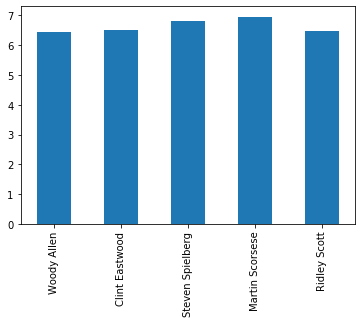

In [287]:
df.groupby(['director'])['vote_average'].mean()[top_prod.index].plot(kind="bar");

- Question 4

Based on the scatter plot that are presented below, we can remark that there is corrolation between the budget and revenue and that this corrolation is positive.

The scatter plot relating the revenue to the runtime shows that most of the movies that have high revenue have a runtime between 100 and 200.

We can also see clearly that there is a weak positive corrolation between the average_rating and the revenure features, where high revenue is imited to movies with rating over 5.

The popularity-revenue scatter plot does not express a clear corrolation wich suggest that this feature is not associated with high revenue movies.

Finally, the release_year feature is clearly associated to high revenue movies as we can see in the scatter plot the closer we get to 2015 the higher the average revenue of movies becomes. 

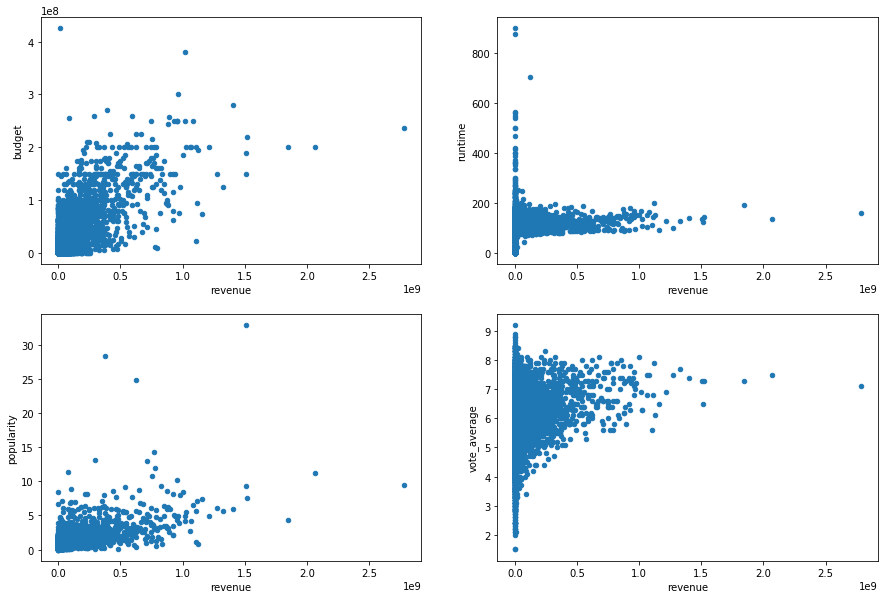

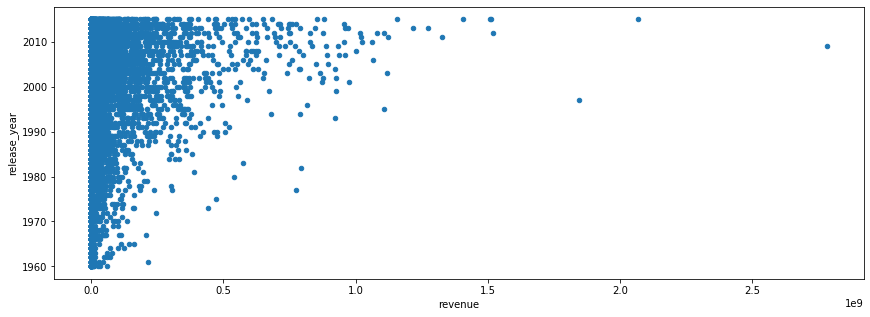

In [288]:
fig= plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
df.plot(kind='scatter', x='revenue', y='budget', ax=ax1)
df.plot(kind='scatter', x='revenue', y='runtime', ax=ax2)
df.plot(kind='scatter', x='revenue', y='popularity', ax=ax3)
df.plot(kind='scatter', x='revenue', y='vote_average', ax=ax4)
df.plot(kind='scatter', x='revenue', y='release_year', figsize=(14.5,5));